In [134]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
import matplotlib.pyplot as plt



In [135]:
NUM_CLASSES = 10

In [136]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [137]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [138]:
x_train[54, 12, 13, 1]

0.36862746

In [139]:
#model = Sequential([
#    Dense(200, activation = 'relu', input_shape=(32, 32, 3)),
#    Flatten(),
#    Dense(150, activation = 'relu'),
#    Dense(10, activation = 'softmax'),
#])

In [140]:
#Functional API
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

In [141]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_21 (Dense)            (None, 200)               614600    
                                                                 
 dense_22 (Dense)            (None, 150)               30150     
                                                                 
 dense_23 (Dense)            (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [142]:
#loss function and Optimizer
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [143]:
#training the model
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8497 - accuracy: 0.3366
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6611 - accuracy: 0.4085
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5758 - accuracy: 0.4388
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5250 - accuracy: 0.4549
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4912 - accuracy: 0.4683
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4575 - accuracy: 0.4797
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4275 - accuracy: 0.4892
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4008 - accuracy: 0.5022
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3900 - accuracy: 0.5049
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.366

In [144]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.4542 - accuracy: 0.4868


[1.4542490243911743, 0.4867999851703644]

In [145]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

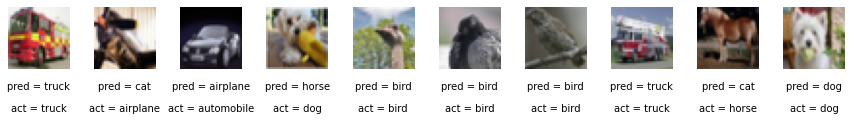

In [146]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)